## Task 1: find the duck

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load image and display
img_filename = './imgs/duck.jpg'
img = Image.open(img_filename)
img.show()  # display the image, you may also use display(img)

In [3]:
def find_the_duck(img):
    img_arr = np.array(img)
    R = img_arr[:,:,0]
    G = img_arr[:,:,1]
    B = img_arr[:,:,2]
    duck = B < 124
    return duck

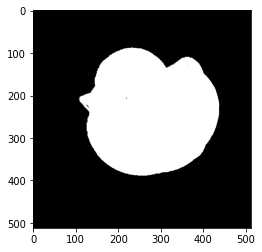

In [4]:
duck = find_the_duck(img)
plt.imshow(duck, cmap=plt.get_cmap('gray'))


## Task 2: find the pine

In [5]:
img_filename = './imgs/pine.jpg'
img = Image.open(img_filename)
img.show()  # display the image, you may also use display(img)

In [6]:
def find_the_pine(img):
   
    rgb = np.array(img)
        
    R = rgb[:,:,0];
    G = rgb[:,:,1];
    B = rgb[:,:,2];
    
#  color space transformation
    img_hsv=img.convert('HSV')
    hsv = np.array(img_hsv)
    H = hsv[:,:,0];
    S = hsv[:,:,1];
    V = hsv[:,:,2];
# the codes below are used to show different channels so as to choose the
# appropriate ones to thresholding

#thresholding at different channels
    G1 = G < 12 # the surface of the pine
    H1 = H < 38 # the sunken area of the pine
    Z = G1|H1;    # combine the above two results 
  
    pine = Z;
    return pine



In [7]:
pine = find_the_pine(img)

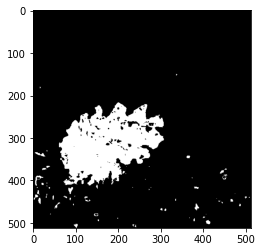

In [8]:
plt.imshow(pine, cmap=plt.get_cmap('gray'))

## Task 3 : Multiple-channel image : Multi-spectral / Hyperspectral Image

### 3.1 Download the dataset
http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Indian_Pines

### 3.2 Load the dataset

In [9]:
# TODO

In [11]:
import scipy.io as sio
data = sio.loadmat('imgs/Indian_pines_corrected.mat') # this is a dictionary
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])


In [12]:
hsi_image = data['indian_pines_corrected']
y = sio.loadmat('imgs/Indian_pines_gt.mat')['indian_pines_gt']


### 3.3 Print the shape of the dataset

In [13]:
# TODO

In [14]:
print(hsi_image.shape)

(145, 145, 200)


### 3.4 Plot the feature of one pixel/sample
Is there any difference between pixels that belong to different class

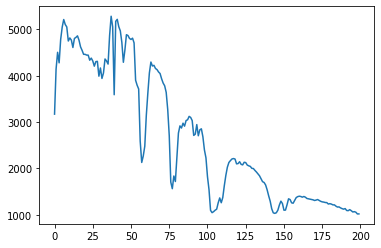

In [15]:
# get any position 
feature = hsi_image[0,0,:]
plt.plot(feature)

#### if you want, change the x-ticks into its real wavelength in the image above

### 3.5 Display the image
use False Color
https://dai-global-digital.com/visualizing-remotely-sensed-data-true-color-and-false-color.html

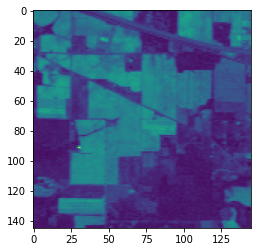

In [16]:
# display a random band/channel
plt.imshow(hsi_image[:,:,180])

In [17]:
# get the three bands
r = hsi_image[:,:,31]
g = hsi_image[:,:, 170]
b = hsi_image[:,:,190]
# normalization
r = (r-np.min(r))/(np.max(r)-np.min(r))  if np.max(r)>0  else r
g = (g-np.min(g))/(np.max(g)-np.min(g))  if np.max(r)>0  else g
b = (b-np.min(b))/(np.max(b)-np.min(b))  if np.max(r)>0  else b
# merge three bands image
composite_color = np.stack([r,g,b], axis=2)

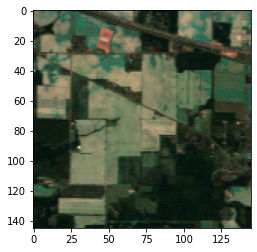

In [18]:
plt.imshow(composite_color)

### 3.6 Display the groundtruth

In [19]:
# print how many distinctive values in groundtruth
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [20]:
y.shape

(145, 145)

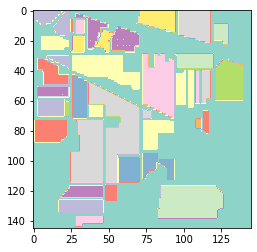

In [21]:
plt.imshow(y, cmap='Set3') # you can change colormap : cmap 